In [1]:
import glob
import matplotlib.pyplot as plt
import os, sys
import pandas as pd
import seaborn as sns
sys.path.append("/Users/sarahfong/tools/py_")
import config_readwrite as crw
import plot_params as pp
pp.fonts()

name = "local_config.ini"
config, cfn = crw.read_config(name)

section="CRISPICK"
ENDOG = config[section]["endog"]
SINGLE_NULL = config[section]["single_null"]
RANDOM_NULLS = config[section]["random_nulls"]
RE = config[section]["results"]

if os.path.exists(RE) is False:
    os.mkdir(RE)

# Load data

In [2]:
def formatDf(file):
    
    # get file name
    filename=os.path.split(file)[1].split("-sgrna-designs.txt")[0]
    
    # open dataframe
    df = pd.read_csv(file, sep='\t',) 
    
    # add filename id
    df["id"] = filename
    
    # add region
    df['region'] = df["Input"].apply(lambda x: x.split("|")[1])
    
    return df, filename

## endogenous

In [3]:
df, fn = formatDf(ENDOG)

df.head()

,Input,Quota,Target Taxon,Target Gene ID,Target Gene Symbol,Target Alias,CRISPR Mechanism,Target Domain,Reference Sequence,Strand of Target,...,On-Target Rank,Off-Target Rank,On-Target Rank Weight,Off-Target Rank Weight,Combined Rank,Pick Order,Picking Round,Picking Notes,id,region
0,endog|chr22:42533418-42533618|nan,5,9606,NaN,NaN,endog|chr22:42533418-42533618|nan,CRISPRa,UNSTRUCTURED,endog|chr22:42533418-42533618|nan,NaN,...,1,3,1.0,1.0,1,1,1,NaN,endog,chr22:42533418-42533618
1,endog|chr22:42533418-42533618|nan,5,9606,NaN,NaN,endog|chr22:42533418-42533618|nan,CRISPRa,UNSTRUCTURED,endog|chr22:42533418-42533618|nan,NaN,...,6,2,1.0,1.0,2,2,1,NaN,endog,chr22:42533418-42533618
2,endog|chr22:42533418-42533618|nan,5,9606,NaN,NaN,endog|chr22:42533418-42533618|nan,CRISPRa,UNSTRUCTURED,endog|chr22:42533418-42533618|nan,NaN,...,5,10,1.0,1.0,4,3,1,NaN,endog,chr22:42533418-42533618
3,endog|chr22:42533418-42533618|nan,5,9606,NaN,NaN,endog|chr22:42533418-42533618|nan,CRISPRa,UNSTRUCTURED,endog|chr22:42533418-42533618|nan,NaN,...,8,8,1.0,1.0,5,4,1,NaN,endog,chr22:42533418-42533618
4,endog|chr22:42533418-42533618|nan,5,9606,NaN,NaN,endog|chr22:42533418-42533618|nan,CRISPRa,UNSTRUCTURED,endog|chr22:42533418-42533618|nan,NaN,...,11,7,1.0,1.0,10,5,1,NaN,endog,chr22:42533418-42533618


## single-null

In [4]:
sn, fn = formatDf(SINGLE_NULL)
sn.head()

,Input,Quota,Target Taxon,Target Gene ID,Target Gene Symbol,Target Alias,CRISPR Mechanism,Target Domain,Reference Sequence,Strand of Target,...,On-Target Rank,Off-Target Rank,On-Target Rank Weight,Off-Target Rank Weight,Combined Rank,Pick Order,Picking Round,Picking Notes,id,region
0,single-null-0|chr22:42533418-42533618|TCGATCGC...,5,9606,NaN,NaN,single-null-0|chr22:42533418-42533618|TCGATCGC...,CRISPRa,UNSTRUCTURED,single-null-0|chr22:42533418-42533618|TCGATCGC...,NaN,...,6,2,1.0,1.0,1,1,1,NaN,single-null-0,chr22:42533418-42533618
1,single-null-0|chr22:42533418-42533618|TCGATCGC...,5,9606,NaN,NaN,single-null-0|chr22:42533418-42533618|TCGATCGC...,CRISPRa,UNSTRUCTURED,single-null-0|chr22:42533418-42533618|TCGATCGC...,NaN,...,5,3,1.0,1.0,2,2,1,NaN,single-null-0,chr22:42533418-42533618
2,single-null-0|chr22:42533418-42533618|TCGATCGC...,5,9606,NaN,NaN,single-null-0|chr22:42533418-42533618|TCGATCGC...,CRISPRa,UNSTRUCTURED,single-null-0|chr22:42533418-42533618|TCGATCGC...,NaN,...,2,6,1.0,1.0,3,3,1,NaN,single-null-0,chr22:42533418-42533618
3,single-null-0|chr22:42533418-42533618|TCGATCGC...,5,9606,NaN,NaN,single-null-0|chr22:42533418-42533618|TCGATCGC...,CRISPRa,UNSTRUCTURED,single-null-0|chr22:42533418-42533618|TCGATCGC...,NaN,...,9,1,1.0,1.0,4,4,1,NaN,single-null-0,chr22:42533418-42533618
4,single-null-0|chr22:42533418-42533618|TCGATCGC...,5,9606,NaN,NaN,single-null-0|chr22:42533418-42533618|TCGATCGC...,CRISPRa,UNSTRUCTURED,single-null-0|chr22:42533418-42533618|TCGATCGC...,NaN,...,1,10,1.0,1.0,5,5,1,NaN,single-null-0,chr22:42533418-42533618


## random 10 nulls

In [5]:
RNS = glob.glob(RANDOM_NULLS)

rn_collection={}
for file in RNS:
    test, fn = formatDf(file)
    rn_collection[fn] = test
    
    # concatenate all random nullomer predictions
rn = pd.concat(rn_collection.values())

In [7]:
print(rn.shape)
rn.head()

(5000, 48)


,Input,Quota,Target Taxon,Target Gene ID,Target Gene Symbol,Target Alias,CRISPR Mechanism,Target Domain,Reference Sequence,Strand of Target,...,On-Target Rank,Off-Target Rank,On-Target Rank Weight,Off-Target Rank Weight,Combined Rank,Pick Order,Picking Round,Picking Notes,id,region
0,single-null-0|chr22:42533418-42533618|TCGATCGC...,5,9606,NaN,NaN,single-null-0|chr22:42533418-42533618|TCGATCGC...,CRISPRa,UNSTRUCTURED,single-null-0|chr22:42533418-42533618|TCGATCGC...,NaN,...,6,2,1.0,1.0,1,1,1,NaN,single-null-0,chr22:42533418-42533618
1,single-null-0|chr22:42533418-42533618|TCGATCGC...,5,9606,NaN,NaN,single-null-0|chr22:42533418-42533618|TCGATCGC...,CRISPRa,UNSTRUCTURED,single-null-0|chr22:42533418-42533618|TCGATCGC...,NaN,...,5,3,1.0,1.0,2,2,1,NaN,single-null-0,chr22:42533418-42533618
2,single-null-0|chr22:42533418-42533618|TCGATCGC...,5,9606,NaN,NaN,single-null-0|chr22:42533418-42533618|TCGATCGC...,CRISPRa,UNSTRUCTURED,single-null-0|chr22:42533418-42533618|TCGATCGC...,NaN,...,2,6,1.0,1.0,3,3,1,NaN,single-null-0,chr22:42533418-42533618
3,single-null-0|chr22:42533418-42533618|TCGATCGC...,5,9606,NaN,NaN,single-null-0|chr22:42533418-42533618|TCGATCGC...,CRISPRa,UNSTRUCTURED,single-null-0|chr22:42533418-42533618|TCGATCGC...,NaN,...,9,1,1.0,1.0,4,4,1,NaN,single-null-0,chr22:42533418-42533618
4,single-null-0|chr22:42533418-42533618|TCGATCGC...,5,9606,NaN,NaN,single-null-0|chr22:42533418-42533618|TCGATCGC...,CRISPRa,UNSTRUCTURED,single-null-0|chr22:42533418-42533618|TCGATCGC...,NaN,...,1,10,1.0,1.0,5,5,1,NaN,single-null-0,chr22:42533418-42533618


# parse off target 

In [8]:
off_annots = {
    "# Off-Target Tier I Match Bin I Matches":"Tier I: TSS-relative region, protein-coding gene",
    "# Off-Target Tier I Match Bin II Matches":"Tier II: TSS-relative region, non-coding gene",
    "# Off-Target Tier I Match Bin III Matches":"Tier III: all regions not in Tier I-II"
    
    }

In [9]:
set(df["# Off-Target Tier I Match Bin I Matches"]), set(df["# Off-Target Tier I Match Bin II Matches"]),    set(df["# Off-Target Tier I Match Bin III Matches"])

({0, 1},
 {0, 1, 2, 3, 4, 5, 7, 9, 13, 16, 17, 34},
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 15, 16, 26, 37})

In [10]:
set(rn["# Off-Target Tier I Match Bin I Matches"]), set(rn["# Off-Target Tier I Match Bin II Matches"]),    set(rn["# Off-Target Tier I Match Bin III Matches"])

({0, 1},
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 28, 33, 34, 38},
 {0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  20,
  21,
  26,
  32,
  37,
  50,
  68,
  92})

(1b) CRISPRa/i: Match Tiers ("Tiers I - III" in the output file):

    Tier I: TSS-relative region of a protein-coding gene
    Tier II: TSS-relative region of a non-coding gene
    Tier III: all regions not in Tier I-II


# off target scores

[Text(0.5, 1.0, 'Crispick off-target'), (-1.0, 20.0), (0.0, 1.05)]

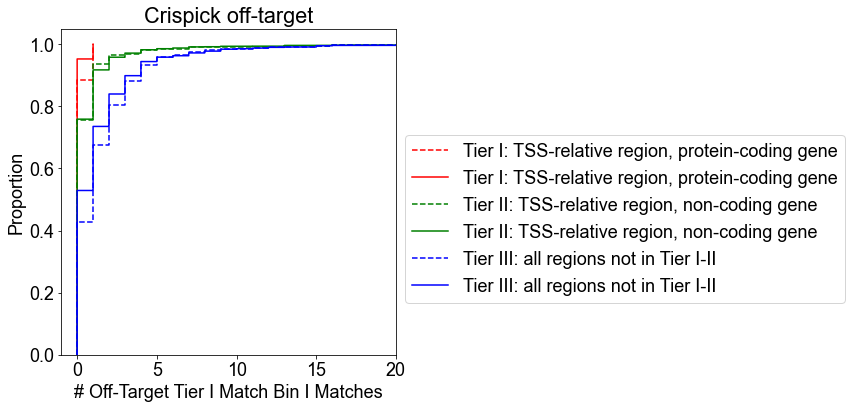

In [15]:
fig, ax= plt.subplots(figsize=(6,6))
color = ["r", "g", 'b']
n = 0
for key, value in off_annots.items():
    sns.ecdfplot(df[key], label=value, 
                 stat="proportion",
                 color = color[n],
                 linestyle="--"
                #common_norm=False,
                #binwidth=1
                )
    """
    sns.ecdfplot(sn[key], label=value, 
                 stat="proportion",
                 color = color[n],
                 #linestyle="--"
                #common_norm=False,
                #binwidth=1
                )
    """
    sns.ecdfplot(rn[key], label=value, 
                 stat="proportion",
                 color = color[n],
                 linestyle="-"
                #common_norm=False,
                #binwidth=1
                )
    n+=1
    
ax.legend(bbox_to_anchor=(1,0.7))
ax.set(title="Crispick off-target", 
      xlim=(-1,20),
      ylim=(0, 1.05)
       
      )

# on target efficiency

<AxesSubplot:xlabel='On-Target Efficacy Score', ylabel='Percent'>

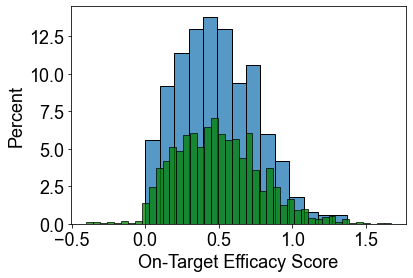

In [19]:
sns.histplot(df["On-Target Efficacy Score"],
              stat="percent",
             common_norm=False)
sns.histplot(rn["On-Target Efficacy Score"], color = "green", 
             stat="percent",
             common_norm=False,)

# per region off target

In [20]:
df.head()

,Input,Quota,Target Taxon,Target Gene ID,Target Gene Symbol,Target Alias,CRISPR Mechanism,Target Domain,Reference Sequence,Strand of Target,...,On-Target Rank,Off-Target Rank,On-Target Rank Weight,Off-Target Rank Weight,Combined Rank,Pick Order,Picking Round,Picking Notes,id,region
0,endog|chr22:42533418-42533618|nan,5,9606,NaN,NaN,endog|chr22:42533418-42533618|nan,CRISPRa,UNSTRUCTURED,endog|chr22:42533418-42533618|nan,NaN,...,1,3,1.0,1.0,1,1,1,NaN,endog,chr22:42533418-42533618
1,endog|chr22:42533418-42533618|nan,5,9606,NaN,NaN,endog|chr22:42533418-42533618|nan,CRISPRa,UNSTRUCTURED,endog|chr22:42533418-42533618|nan,NaN,...,6,2,1.0,1.0,2,2,1,NaN,endog,chr22:42533418-42533618
2,endog|chr22:42533418-42533618|nan,5,9606,NaN,NaN,endog|chr22:42533418-42533618|nan,CRISPRa,UNSTRUCTURED,endog|chr22:42533418-42533618|nan,NaN,...,5,10,1.0,1.0,4,3,1,NaN,endog,chr22:42533418-42533618
3,endog|chr22:42533418-42533618|nan,5,9606,NaN,NaN,endog|chr22:42533418-42533618|nan,CRISPRa,UNSTRUCTURED,endog|chr22:42533418-42533618|nan,NaN,...,8,8,1.0,1.0,5,4,1,NaN,endog,chr22:42533418-42533618
4,endog|chr22:42533418-42533618|nan,5,9606,NaN,NaN,endog|chr22:42533418-42533618|nan,CRISPRa,UNSTRUCTURED,endog|chr22:42533418-42533618|nan,NaN,...,11,7,1.0,1.0,10,5,1,NaN,endog,chr22:42533418-42533618


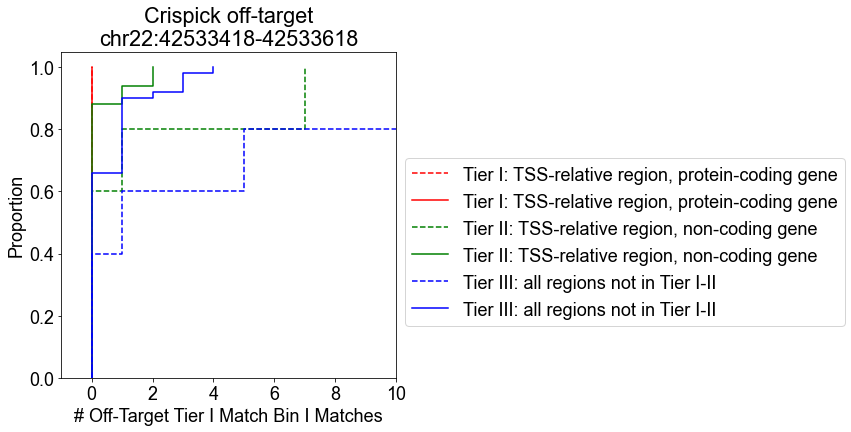

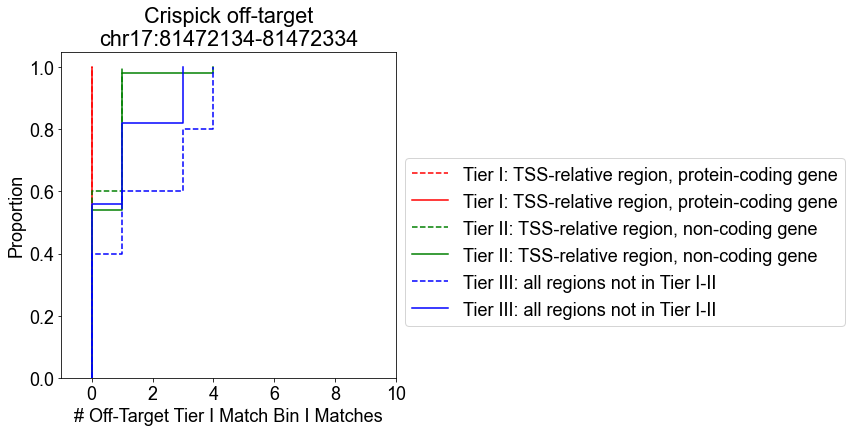

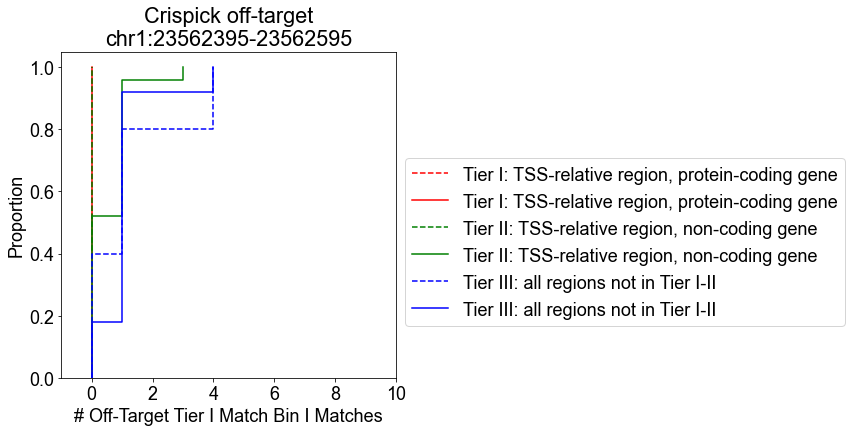

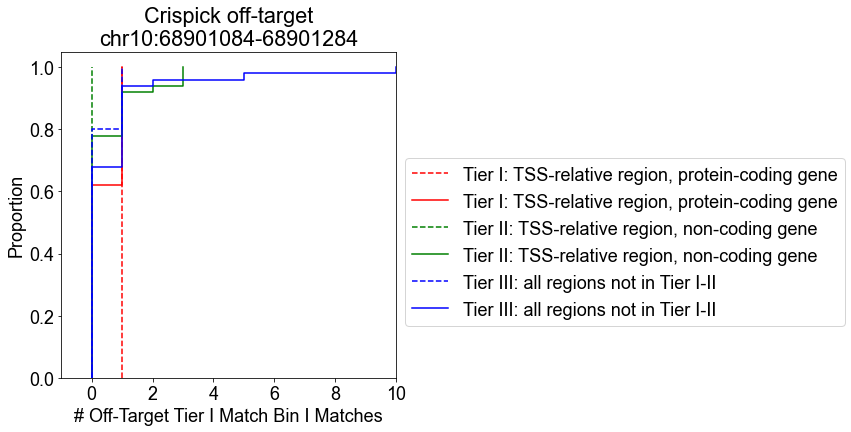

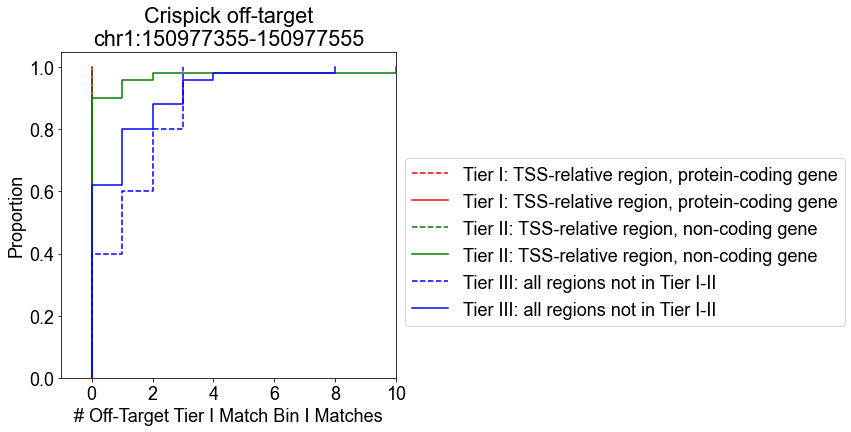

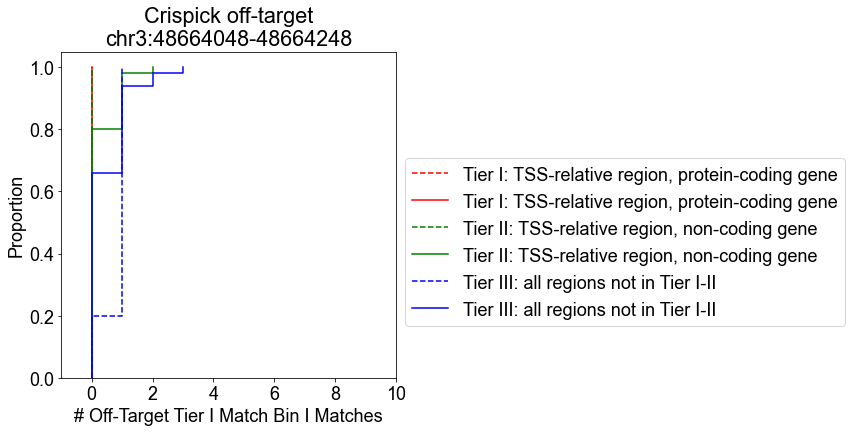

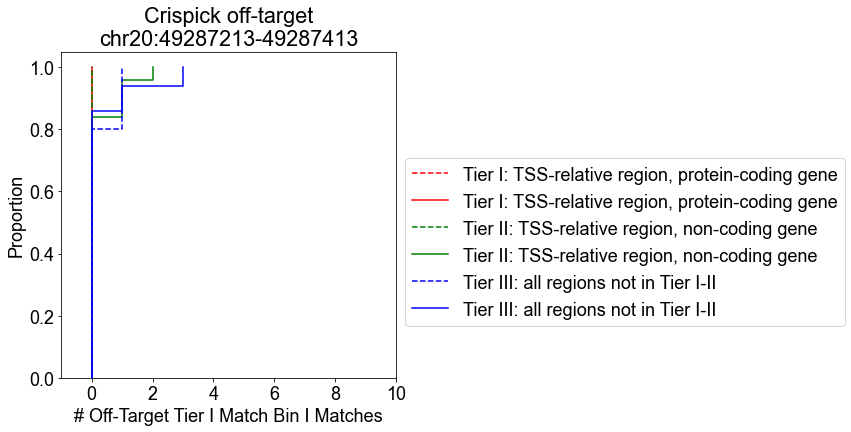

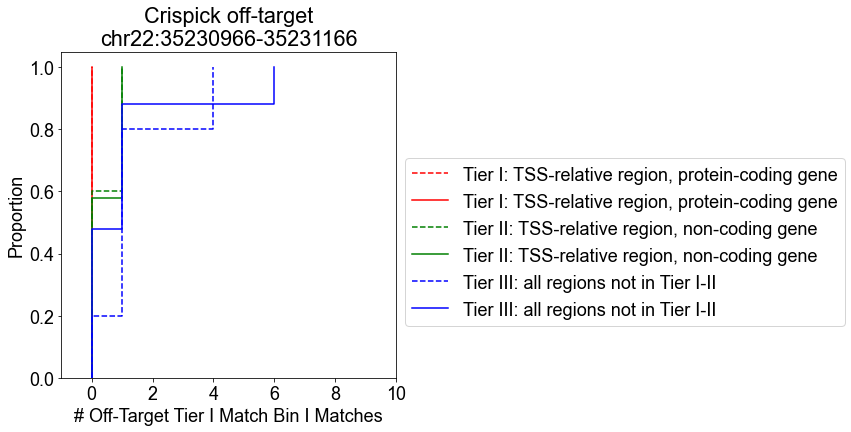

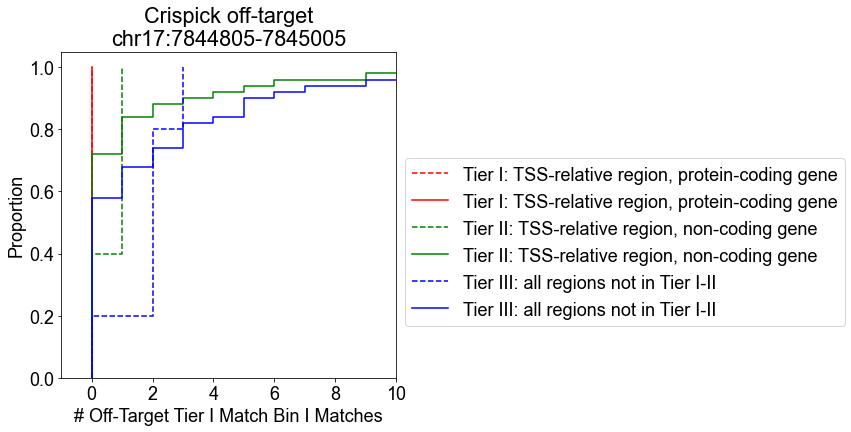

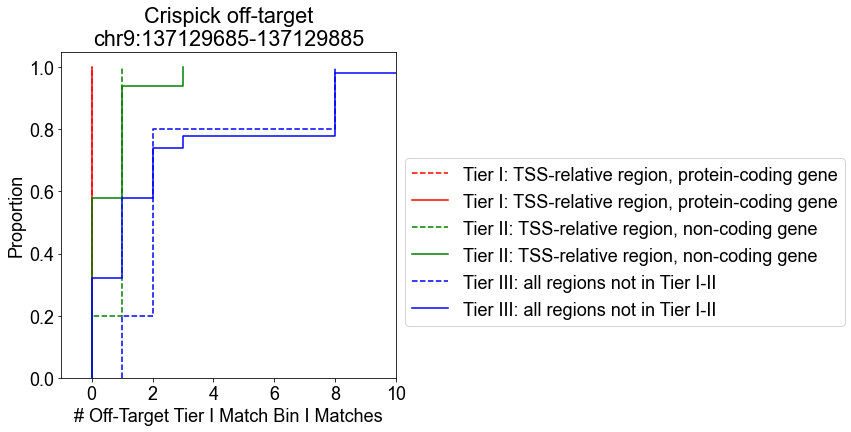

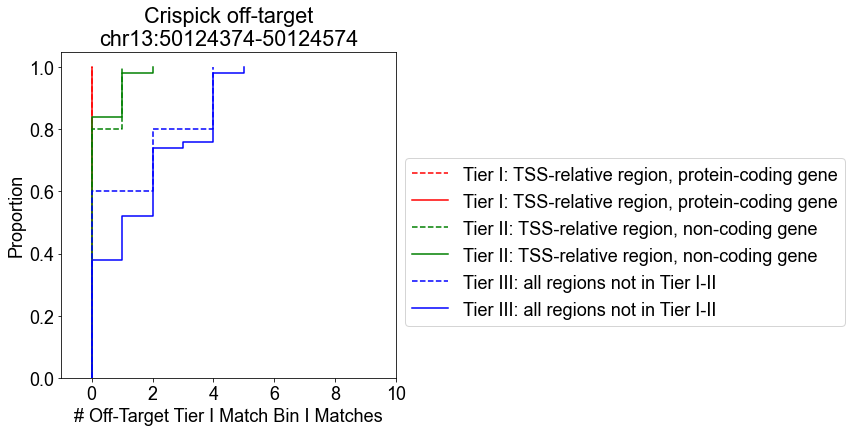

In [38]:
rcount = 0
for region in df.region.unique():

    # subset by region
    endog_region=df.loc[df["region"]==region]
    rn_region = rn.loc[rn["region"]==region]

    color = ["r", "g", 'b']
    n = 0
    fig, ax= plt.subplots(figsize=(6,6))
    
    # per tier of off target
    for key, value in off_annots.items():
        sns.ecdfplot(endog_region[key], label=value, 
                     stat="proportion",
                     color = color[n],
                     linestyle="--"
                    #common_norm=False,
                    #binwidth=1
                    )
        sns.ecdfplot(rn_region[key], label=value, 
                     stat="proportion",
                     color = color[n],
                     linestyle="-"
                    #common_norm=False,
                    #binwidth=1
                    )


        n+=1

    ax.legend(bbox_to_anchor=(1,0.7))
    ax.set(title=f"Crispick off-target\n{region}", 
          xlim=(-1,10),
          ylim=(0, 1.05)

          )
    out = os.path.join(RE, f"crispick-a.offtarget.{region}.pdf")
    plt.savefig(out, bbox_inches='tight')
    plt.show()
    plt.close()
    rcount +=1
    if rcount>10:
        break



In [37]:
out

'/Users/sarahfong/Desktop/local_data/MPRA/nullomers/library/results/crisprick/results/crispick-a.offtarget.chr20:32790124-32790324.pdf'